# Numpy

NumPy之于数值计算特别重要的原因之一，是因为它可以高效处理大数组的数
据。这是因为：
NumPy是在一个连续的内存块中存储数据，独立于其他Python内置对象。
NumPy的C语言编写的算法库可以操作内存，而不必进行类型检查或其它前期
工作。比起Python的内置序列，NumPy数组使用的内存更少。
NumPy可以在整个数组上执行复杂的计算，而不需要Python的for循环。

In [1]:
import numpy as np

marr = np.arange(1000000)
li = list(range(1000000))

In [2]:
%time for _ in range(10): arr2 = marr*2

Wall time: 41.5 ms


In [3]:
%time for _ in range(10): my_list2 = [x * 2 for x in li]

Wall time: 939 ms


### NumPy的ndarray：一种多维数组对象

In [4]:
import numpy as np

data = np.random.randn(2,3)
data

array([[-0.90910763, -0.61616134,  0.87244057],
       [ 0.66635484, -1.33825278, -0.69946587]])

In [5]:
data.shape

(2, 3)

dtype说明数组数据类型的对象

In [6]:
data.dtype

dtype('float64')

### 创建ndarray


In [7]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [8]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

- ndim维度，shape能体现每一维度的结构

In [9]:
arr3 = np.concatenate([arr2,arr2])
print(arr3.ndim)
print(arr3.shape)

2
(4, 4)


- 函数asarray

In [10]:
np.asarray(data1,dtype=int)

array([6, 7, 8, 0, 1])

- 函数ones_like,类似的有zeros_like

In [11]:
np.ones_like(arr3)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

- 函数empty和empty_like创建新数组，只分配内存空间但不填充任何职
- 函数full和full_like创建新数组

In [12]:
np.full_like(arr3,3,dtype=int)

array([[3, 3, 3, 3],
       [3, 3, 3, 3],
       [3, 3, 3, 3],
       [3, 3, 3, 3]])

- 函数eye和identity，创建一个正方的N*N单位矩阵。

In [13]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [14]:
np.identity(5,dtype=int)

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

#### 使用astype转换数值形式
笔记：调用astype总会创建一个新的数组（一个数据的备份），即使新的dtype与旧的dtype相同。

In [15]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
print(numeric_strings)
numeric_strings.astype(float)

[b'1.25' b'-9.6' b'42']


array([ 1.25, -9.6 , 42.  ])

In [16]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

- 跟列表最重要的区别在于，数组切片是原始数组的视图。这意味着数据不会被复制，视图上的任何修改都会直接反映到源数组上

In [17]:
arr = np.arange(10)
arr_slice = arr[5:8]
print(arr_slice)
arr_slice[1] = 12345
print(arr_slice)
print(arr)

[5 6 7]
[    5 12345     7]
[    0     1     2     3     4     5 12345     7     8     9]


In [18]:
arr_slice = arr[5:8]
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

注意：如果你想要得到的是ndarray切片的一份副本而非视图，就需要明确地进
行复制操作，例如arr[5:8].copy()。

### Boolean Indexing
### 布尔型索引
- 使用umpy.random中的randn函数生成一些正态分布的随机数据

In [20]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7,4)
print(names,data,sep='\n')

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[-0.82867283 -0.66994426  2.48603656  0.84410423]
 [ 0.82421713 -0.85967673  0.07011453  0.84201723]
 [-0.87483424  0.78749624 -0.17501823 -1.3401449 ]
 [ 0.64666284  1.41427653 -0.71379129 -1.69432399]
 [-0.56168878  0.83952107 -2.06413678 -0.13980862]
 [ 0.85034094  0.04463456  1.21692999 -1.19764279]
 [-0.65087571  0.54159431 -0.0501617   0.19298972]]


假设每个名字都对应data数组中的一行，而我们想要选出对应于名字"Bob"的所有
行。跟算术运算一样，数组的比较运算（如==）也是矢量化的。因此，对names
和字符串"Bob"的比较运算将会产生一个布尔型数组

In [21]:
names == 'Bob'
print(names)
data[names=='Bob']

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']


array([[-0.82867283, -0.66994426,  2.48603656,  0.84410423],
       [ 0.64666284,  1.41427653, -0.71379129, -1.69432399]])

- 布尔型数组的长度必须跟被索引的轴长度一致。此外，还可以将布尔型数组跟切片、整数（或整数序列，稍后将对此进行详细讲解）混合使用

In [22]:
# 混合切片
data[names=='Bob',2:]

array([[ 2.48603656,  0.84410423],
       [-0.71379129, -1.69432399]])

In [23]:
# 索引列
data[names=='Bob',3]

array([ 0.84410423, -1.69432399])

- !=与~ ：不等于和非（翻转条件）

In [27]:
print(data[names != 'Bob'])
print(data[~(names == 'Bob')])

[[ 0.82421713 -0.85967673  0.07011453  0.84201723]
 [-0.87483424  0.78749624 -0.17501823 -1.3401449 ]
 [-0.56168878  0.83952107 -2.06413678 -0.13980862]
 [ 0.85034094  0.04463456  1.21692999 -1.19764279]
 [-0.65087571  0.54159431 -0.0501617   0.19298972]]
[[ 0.82421713 -0.85967673  0.07011453  0.84201723]
 [-0.87483424  0.78749624 -0.17501823 -1.3401449 ]
 [-0.56168878  0.83952107 -2.06413678 -0.13980862]
 [ 0.85034094  0.04463456  1.21692999 -1.19764279]
 [-0.65087571  0.54159431 -0.0501617   0.19298972]]


#### 通过布尔型索引选取数组中的数据，将总是创建数据的副本，即使返回一模一样的数组也是如此

In [28]:
data[names != 'Bob'] is data[~(names == 'Bob')]

False

In [29]:
data[names != 'Bob'] is data[~(names == 'Bob')]

False

In [31]:
cond = names == 'Bob'
cond

array([ True, False, False,  True, False, False, False])

In [32]:
data[~cond]

array([[ 0.82421713, -0.85967673,  0.07011453,  0.84201723],
       [-0.87483424,  0.78749624, -0.17501823, -1.3401449 ],
       [-0.56168878,  0.83952107, -2.06413678, -0.13980862],
       [ 0.85034094,  0.04463456,  1.21692999, -1.19764279],
       [-0.65087571,  0.54159431, -0.0501617 ,  0.19298972]])

- 选取这三个名字中的两个需要组合应用多个布尔条件，使用&（和）、|（或）之类的布尔算术运算符即可

In [33]:
mask = (names == "Bob") | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [34]:
data[mask]

array([[-0.82867283, -0.66994426,  2.48603656,  0.84410423],
       [-0.87483424,  0.78749624, -0.17501823, -1.3401449 ],
       [ 0.64666284,  1.41427653, -0.71379129, -1.69432399],
       [-0.56168878,  0.83952107, -2.06413678, -0.13980862]])

- 通过布尔型数组设置值是一种经常用到的手段。为了将data中的所有负值都设置为0，我们只需

In [35]:
data[data < 0] = 0

In [36]:
data

array([[0.        , 0.        , 2.48603656, 0.84410423],
       [0.82421713, 0.        , 0.07011453, 0.84201723],
       [0.        , 0.78749624, 0.        , 0.        ],
       [0.64666284, 1.41427653, 0.        , 0.        ],
       [0.        , 0.83952107, 0.        , 0.        ],
       [0.85034094, 0.04463456, 1.21692999, 0.        ],
       [0.        , 0.54159431, 0.        , 0.19298972]])

- 通过一维布尔数组设置整行或列的值也很简单：

In [37]:
data[names!='Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.82421713, 0.        , 0.07011453, 0.84201723],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.85034094, 0.04463456, 1.21692999, 0.        ],
       [0.        , 0.54159431, 0.        , 0.19298972]])

# 花式索引

In [38]:
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i
arr    

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

- 为了以特定顺序选取行子集，只需传入一个用于指定顺序的整数列表或ndarray即可

In [39]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

- 使用负数索引将会从末尾开始选取行

In [40]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

  按数组取axis=1轴的值

In [41]:
arr[:,[1, 3]]

array([[0., 0.],
       [1., 1.],
       [2., 2.],
       [3., 3.],
       [4., 4.],
       [5., 5.],
       [6., 6.],
       [7., 7.]])

- 一次传入多个索引数组会有一点特别。它返回的是一个一维数组，其中的元素对应各个索引元组

In [44]:
arr = np.arange(32).reshape(8,4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [45]:
arr[[1,5,7,1],[0,3,1,2]]

array([ 4, 23, 29,  6])

In [46]:
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

- 无论数组是多少维的，花式索引总是一维的
- 这个花式索引的行为可能会跟某些用户的预期不一样（包括我在内），选取矩阵的行列子集应该是矩形区域的形式才对。下面是得到该结果的一个办法

In [47]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [48]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

## 数组转置和轴转换
- transpose方法 和特殊的T属性。类比MATLAB里T表示转置

In [49]:
arr = np.arange(15).reshape(3,5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [50]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

在进行矩阵计算时，经常需要用到该操作，比如利用np.dot计算矩阵内积

In [51]:
arr = np.random.randn(6,3)

In [52]:
arr

array([[ 0.90497457,  0.94153786,  0.54449991],
       [-0.00630263,  2.91588294, -0.78127407],
       [ 0.8688125 ,  0.13917417, -0.12201623],
       [-0.60044467,  0.13979174,  0.82993274],
       [ 0.74912243, -0.02098178,  0.12986233],
       [-0.54238764, -0.70733163,  0.39592836]])

In [53]:
np.dot(arr, arr.T)

array([[ 2.00195266,  2.3143068 ,  0.85085314,  0.04013036,  0.72889163,
        -0.94124358],
       [ 2.3143068 ,  9.11280219,  0.4956679 , -0.23700421, -0.16735993,
        -2.36840634],
       [ 0.85085314,  0.4956679 ,  0.78909257, -0.6034837 ,  0.6320815 ,
        -0.61798514],
       [ 0.04013036, -0.23700421, -0.6034837 ,  1.06886389, -0.34496265,
         0.55538857],
       [ 0.72889163, -0.16735993,  0.6320815 , -0.34496265,  0.57848887,
        -0.34005749],
       [-0.94124358, -2.36840634, -0.61798514,  0.55538857, -0.34005749,
         0.95126167]])

In [54]:
np.dot(arr.T, arr)

array([[ 2.78975642,  1.23859914, -0.22411914],
       [ 1.23859914,  9.92853629, -1.94917761],
       [-0.22411914, -1.94917761,  1.78416913]])

In [55]:
arr.T

array([[ 0.90497457, -0.00630263,  0.8688125 , -0.60044467,  0.74912243,
        -0.54238764],
       [ 0.94153786,  2.91588294,  0.13917417,  0.13979174, -0.02098178,
        -0.70733163],
       [ 0.54449991, -0.78127407, -0.12201623,  0.82993274,  0.12986233,
         0.39592836]])

In [56]:
a =  0.90497457*-0.00630263 + 0.94153786*2.91588294 + 0.54449991*-0.78127407
a

2.3143068026636553

- 对于高维数组，transpose需要得到一个由轴编号组成的元组才能对这些轴进行转置（比较费脑子）
- 这里，第一个轴被换成了第二个，第二个轴被换成了第一个，最后一个轴不变

In [57]:
arr = np.random.randn(16).reshape(2,2,4)
print(arr)
arr.transpose((1,0,2))

[[[ 0.79742977 -0.12131175  2.81777819 -0.45214597]
  [-0.63315754 -0.92534524 -0.89831492 -1.25730707]]

 [[-0.72923138  0.2780911  -0.38926897 -0.96668563]
  [-1.55332007  1.28234994  0.40153401 -1.12843597]]]


array([[[ 0.79742977, -0.12131175,  2.81777819, -0.45214597],
        [-0.72923138,  0.2780911 , -0.38926897, -0.96668563]],

       [[-0.63315754, -0.92534524, -0.89831492, -1.25730707],
        [-1.55332007,  1.28234994,  0.40153401, -1.12843597]]])

- 简单的转置可以使用.T，它其实就是进行轴对换而已。ndarray还有一个swapaxes方法，它需要接受一对轴编号
- swapaxes也是返回源数据的视图（不会进行任何复制操作）。

In [58]:
arr

array([[[ 0.79742977, -0.12131175,  2.81777819, -0.45214597],
        [-0.63315754, -0.92534524, -0.89831492, -1.25730707]],

       [[-0.72923138,  0.2780911 , -0.38926897, -0.96668563],
        [-1.55332007,  1.28234994,  0.40153401, -1.12843597]]])

In [60]:
arr.swapaxes(1,2)

array([[[ 0.79742977, -0.63315754],
        [-0.12131175, -0.92534524],
        [ 2.81777819, -0.89831492],
        [-0.45214597, -1.25730707]],

       [[-0.72923138, -1.55332007],
        [ 0.2780911 ,  1.28234994],
        [-0.38926897,  0.40153401],
        [-0.96668563, -1.12843597]]])

### 通用函数：快速的元素级数组函数

In [61]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [63]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

- 上述都是一元通用函数；接受2个数组的二元通用函数（add,maximum），返回一个结果数组

In [64]:
x = np.random.randn(8)
y = np.random.randn(8)
print(x,y,sep='\n')

[-0.21068526  0.07950777 -0.51891168 -0.01517427  0.9895869   1.95878565
  0.99908812  0.93032839]
[ 0.65941302 -0.64978462 -0.71005323 -1.56406968  1.27609497  0.36890148
 -0.14878707  0.46901404]


In [66]:
# 计算了x和y中元素级别最大的元素
np.maximum(x,y)

array([ 0.65941302,  0.07950777, -0.51891168, -0.01517427,  1.27609497,
        1.95878565,  0.99908812,  0.93032839])

In [67]:
# 有些ufunc也可以返回多个数组，如modf。它是Python内置函数divmod的矢量化版本，会返回浮点数数组的小数和整数部分。
arr = np.random.randn(7)*5
arr

array([-13.87983495,  -0.43852114,   8.88101574,   8.01351792,
         2.04194133,  -1.5773087 ,   3.95858128])

In [69]:
remainder, whole_part = np.modf(arr)

In [70]:
remainder

array([-0.87983495, -0.43852114,  0.88101574,  0.01351792,  0.04194133,
       -0.5773087 ,  0.95858128])

In [71]:
whole_part

array([-13.,  -0.,   8.,   8.,   2.,  -1.,   3.])

In [73]:
np.sqrt(arr)

d:\python35\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan,        nan, 2.98010331, 2.83081577, 1.42896513,
              nan, 1.98961838])

In [74]:
np.sqrt(arr, arr)

d:\python35\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([       nan,        nan, 2.98010331, 2.83081577, 1.42896513,
              nan, 1.98961838])

In [75]:
# Ufuncs可以接受一个out可选参数，这样就能在数组原地进行操作
# arr 值更改了
arr

array([       nan,        nan, 2.98010331, 2.83081577, 1.42896513,
              nan, 1.98961838])

### 利用数组进行数据处理

简单的例子，假设我们想要在一组值（网格型）上计算函数sqrt(x^2+y^2)。
np.meshgrid函数接受两个一维数组，并产生两个二维矩阵（对应于两个数组中所
有的(x,y)对）

In [80]:
points = np.arange(-5,5,0.01)  #均匀生成生成1000个数
points.astype(float)

array([-5.0000000e+00, -4.9900000e+00, -4.9800000e+00, -4.9700000e+00,
       -4.9600000e+00, -4.9500000e+00, -4.9400000e+00, -4.9300000e+00,
       -4.9200000e+00, -4.9100000e+00, -4.9000000e+00, -4.8900000e+00,
       -4.8800000e+00, -4.8700000e+00, -4.8600000e+00, -4.8500000e+00,
       -4.8400000e+00, -4.8300000e+00, -4.8200000e+00, -4.8100000e+00,
       -4.8000000e+00, -4.7900000e+00, -4.7800000e+00, -4.7700000e+00,
       -4.7600000e+00, -4.7500000e+00, -4.7400000e+00, -4.7300000e+00,
       -4.7200000e+00, -4.7100000e+00, -4.7000000e+00, -4.6900000e+00,
       -4.6800000e+00, -4.6700000e+00, -4.6600000e+00, -4.6500000e+00,
       -4.6400000e+00, -4.6300000e+00, -4.6200000e+00, -4.6100000e+00,
       -4.6000000e+00, -4.5900000e+00, -4.5800000e+00, -4.5700000e+00,
       -4.5600000e+00, -4.5500000e+00, -4.5400000e+00, -4.5300000e+00,
       -4.5200000e+00, -4.5100000e+00, -4.5000000e+00, -4.4900000e+00,
       -4.4800000e+00, -4.4700000e+00, -4.4600000e+00, -4.4500000e+00,
      

In [83]:
xs, ys = np.meshgrid(points,points)
print(xs,ys,sep='\n')
zs = np.sqrt(xs**2 + ys**2)
print(zs.shape)
print(zs.dtype)
zs

[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]
[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]
(1000, 1000)
float64


array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

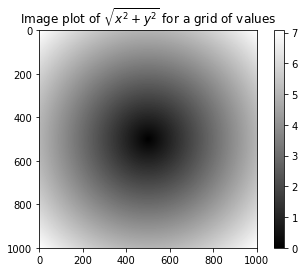

In [89]:
import matplotlib.pyplot as plt

plt.imshow(zs, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### 将条件逻辑表述为数组运算
- numpy.where函数是三元表达式x if condition else y的矢量化版本。假设我们有一个布尔数组和两个值数组

In [90]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

假设我们想要根据cond中的值选取xarr和yarr的值：当cond中的值为True时，选
取xarr的值，否则从yarr中选取。列表推导式的写法应该如下所示

In [91]:
result = [(x if c else y)
         for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

上面由纯Python完成。下面使用多维数组

In [92]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [93]:
result = np.where(cond, 4, "a")
result

array(['4', 'a', '4', '4', 'a'], dtype='<U11')

np.where的第二个和第三个参数不必是数组，它们都可以是标量值。在数据分析
工作中，where通常用于根据另一个数组而产生一个新的数组。假设有一个由随机
数据组成的矩阵，你希望将所有正值替换为2，将所有负值替换为－2。若利用
np.where，则会非常简单：

In [94]:
arr = np.random.randn(4, 4)
arr

array([[ 0.48954327,  0.49677315, -1.64224812,  0.59504812],
       [ 0.32632152,  0.52136001,  1.38972759,  1.02974526],
       [ 0.05323464, -1.02186925,  0.45507806, -0.07092465],
       [ 0.12609273,  0.37344093,  0.30442641, -0.10400537]])

In [95]:
arr > 0

array([[ True,  True, False,  True],
       [ True,  True,  True,  True],
       [ True, False,  True, False],
       [ True,  True,  True, False]])

In [96]:
np.where(arr > 0,2,-2)

array([[ 2,  2, -2,  2],
       [ 2,  2,  2,  2],
       [ 2, -2,  2, -2],
       [ 2,  2,  2, -2]])

使用np.where，可以将标量和数组结合起来。例如，我可用常数2替换arr中所有
正的值：

In [97]:
np.where(arr>0,2,arr)

array([[ 2.        ,  2.        , -1.64224812,  2.        ],
       [ 2.        ,  2.        ,  2.        ,  2.        ],
       [ 2.        , -1.02186925,  2.        , -0.07092465],
       [ 2.        ,  2.        ,  2.        , -0.10400537]])

## 数学和统计方法
- 可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。sum、mean以及标准差std等聚合计算（aggregation，通常叫做约简（reduction））既可以当做数组的实例方法调用，也可以当做顶级NumPy函数使用。


In [98]:
#生成了一些正态分布随机数据，然后做了聚类统计
arr = np.random.randn(5,4)
arr

array([[ 0.40620543, -1.75319539,  1.2013284 , -0.87190043],
       [-0.21352419, -1.37759899,  1.00960588, -1.36391015],
       [ 0.30354944,  1.64166694,  0.50679962,  0.58882913],
       [ 1.85511538, -1.77277096,  0.3163528 , -0.38731727],
       [-0.48953051,  0.94816331, -0.07343513,  1.9514427 ]])

In [99]:
print(arr.mean())
print(np.mean(arr))

0.12129380095341746
0.12129380095341746


- mean和sum这类的函数可以接受一个axis选项参数，用于计算该轴向上的统计
值，最终结果是一个少一维的数组：

In [100]:
arr.mean(axis=1)

array([-0.2543905 , -0.48635686,  0.76021128,  0.00284499,  0.58416009])

In [101]:
arr.sum(axis=1)

array([-1.01756199, -1.94542745,  3.04084514,  0.01137995,  2.33664037])

In [102]:
arr.sum(0)

array([ 1.86181554, -2.31373508,  2.96065158, -0.08285602])

- 其他如cumsum和cumprod之类的方法则不聚合，而是产生一个由中间结果组成
的数组：

cunsum（累积和） cumprod（累计积）之类的方法则不聚合，而是产生一个由中间结果组成的数组

In [103]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [104]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(arr)
print(arr.cumsum(axis=0))
print(arr.cumprod(axis=1))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


- 在多维数组中，累加函数（如cumsum）返回的是同样大小的数组，但是会根据每
个低维的切片沿着标记轴计算部分聚类：

### 用于布尔型数组的方法

- 在上面这些方法中，布尔值会被强制转换为1（True）和0（False）。因此，sum
经常被用来对布尔型数组中的True值计数：

In [107]:
arr = np.random.randn(100)
print(arr)
(arr > 0).sum()

[-1.7165243  -0.4151094  -1.94805012 -0.93404809  3.26653207  1.94600868
  0.02614253  0.01978706  0.94966593 -0.32284059 -1.73368846  1.01144933
  0.01432012 -1.64623525  1.04022887  1.3476399  -0.55666972 -2.19613614
  1.81053089 -0.28891143  0.88965198 -1.5020392   1.19236574  0.13087443
 -0.20981564  0.69785118  1.66379476  0.23682454 -3.02066028 -0.03926635
 -0.62721606 -0.86323571  1.19850094  0.09527457  0.0238112  -0.81327474
  0.62886712 -0.77644083 -0.87015092 -0.01061335 -0.79829746 -1.44992619
  1.6248631   0.63782043  0.79357849 -2.1175116  -1.41819403 -0.50217016
 -1.45582996  0.67886568 -0.20265759 -0.02901974 -0.80214908  0.54487397
  0.64930093 -0.37779019  0.16849788 -1.69781829  0.48269631  0.7689388
  0.19179665  0.48466511 -0.55522886  1.51237328 -3.51373016  0.1418634
  1.42499624  0.13660189 -0.1593306   0.32181096  0.14914366 -0.65899604
  1.16763288  0.5802181  -0.15112379  0.0332964   1.40132684 -0.66832535
 -1.39072027  2.2711293  -0.5484572  -0.33961656  0.4

49

- any测试数组中是否存在1个或多个True
- all检查数组中所有值是否都是True

In [108]:
bools = np.array([False, False, True, False])
print(bools.any())
print(bools.all())

True
False


### 排序

In [3]:
import numpy as np

arr = np.random.randn(6)
arr

array([-2.81125031,  0.24967377,  1.77774361,  0.08912148,  0.50321306,
       -2.20148513])

In [4]:
arr.sort()

In [5]:
arr

array([-2.81125031, -2.20148513,  0.08912148,  0.24967377,  0.50321306,
        1.77774361])

- 多维数组可以在任何一个轴向上进行排序，只需将轴号传给sort即可。

In [6]:
arr = np.random.randn(5,3)
arr

array([[-0.90866596,  1.49147557, -1.70303804],
       [ 0.39758297, -0.05354553,  0.09864328],
       [ 1.01367452, -0.14352002, -0.37775602],
       [ 0.44201008,  0.88987351, -1.15777944],
       [ 0.58888556, -1.28307471, -0.83364414]])

In [7]:
arr.sort(1)

In [8]:
arr

array([[-1.70303804, -0.90866596,  1.49147557],
       [-0.05354553,  0.09864328,  0.39758297],
       [-0.37775602, -0.14352002,  1.01367452],
       [-1.15777944,  0.44201008,  0.88987351],
       [-1.28307471, -0.83364414,  0.58888556]])

顶级方法np.sort返回的是数组的已排序副本，而就地排序则会修改数组本身。计
算数组分位数最简单的办法是对其进行排序，然后选取特定位置的值

In [9]:
large_arr = np.random.randn(1000)

large_arr.sort()

In [10]:
large_arr[int(0.05*len(large_arr))]
# 5%分位数

-1.5983663654658307

### 唯一化及其它的集合逻辑
- np.unique用于找出数组中的唯一值并返回已排序的结果

In [11]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [12]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

与等价的纯Python代码来对比一下

In [13]:
sorted(set(names))

['Bob', 'Joe', 'Will']

- 另一个函数np.in1d用于测试一个数组中的值在另一个数组中的成员资格，返回一
个布尔型数组

In [15]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

### 用于数组的文件输入输出

NumPy能够读写磁盘上的文本数据或二进制数据。这一小节只讨论NumPy的内置
二进制格式，因为更多的用户会使用pandas或其它工具加载文本或表格数据

In [16]:
arr = np.random.randn(10)
np.save('some_arry',arr)

In [17]:
np.load('some_arry.npy')

array([-0.32993615,  0.80906909, -1.13433314,  0.26690272,  1.40295191,
       -0.71360646,  0.6824525 , -0.36266905,  0.65087568, -1.25897413])

- 通过np.savez可以将多个数组保存到一个未压缩文件中，将数组以关键字参数的形
式传入即可

In [18]:
np.savez('array_archive.npz',a=arr,b=arr)

In [19]:
arch = np.load('array_archive.npz')
arch

In [20]:
arch['b']

array([-0.32993615,  0.80906909, -1.13433314,  0.26690272,  1.40295191,
       -0.71360646,  0.6824525 , -0.36266905,  0.65087568, -1.25897413])

- 如果要将数据压缩，可以使用numpy.savez_compressed

In [21]:
np.savez_compressed('arrays_compressed.npz',a=arr,b=arr)

### 线性代数

线性代数（如矩阵乘法、矩阵分解、行列式以及其他方阵数学等）是任何数组库的
重要组成部分。不像某些语言（如MATLAB），通过*对两个二维数组相乘得到的
是一个元素级的积，而不是一个矩阵点积。因此，NumPy提供了一个用于矩阵乘
法的dot函数（既是一个数组方法也是numpy命名空间中的一个函数）

In [22]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [23]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [24]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [26]:
x.dot(y)
# x.dot(y)等价于np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [27]:
np.dot(x, np.ones(3))

array([ 6., 15.])

- @可以用作中缀运算符，进行矩阵乘法

In [30]:
x @ np.ones(3)

array([ 6., 15.])

numpy.linalg中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的东西。
它们跟MATLAB和R等语言所使用的是相同的行业标准线性代数库，如BLAS、
LAPACK、Intel MKL（Math Kernel Library，可能有，取决于你的NumPy版
本）等：

In [31]:
from numpy.linalg import inv, qr

X = np.random.randn(5,5)
X

array([[ 0.01089894, -1.69657877,  0.17424813,  2.11535462, -1.50659642],
       [-0.00785055, -0.71694381, -1.68718426,  1.40621666,  1.00099342],
       [-1.70903816,  0.76419883, -0.35157922, -0.55311628,  1.56318736],
       [ 1.10429931, -1.1534802 , -2.0788472 ,  0.74232444, -1.05704765],
       [-0.01191432, -0.66872709, -1.34159019, -0.44786406, -0.06543034]])

In [33]:
mat = X.T.dot(X)
mat

array([[ 4.14061075, -2.5847274 , -1.66367863,  1.78239672, -3.86234291],
       [-2.5847274 ,  5.75410027,  3.94038097, -5.57649259,  4.29602798],
       [-1.66367863,  3.94038097,  9.122031  , -2.7518149 , -0.21574491],
       [ 1.78239672, -5.57649259, -2.7518149 ,  7.50973588, -3.39936486],
       [-3.86234291,  4.29602798, -0.21574491, -3.39936486,  6.83700616]])

In [35]:
inv(X.T.dot(X))

array([[ 0.89680452, -1.06019629,  0.5435842 , -0.33846683,  1.02166103],
       [-1.06019629,  4.79249375, -1.73763499,  1.95448887, -2.69334173],
       [ 0.5435842 , -1.73763499,  0.79797545, -0.62236006,  1.1146644 ],
       [-0.33846683,  1.95448887, -0.62236006,  1.01353754, -0.93501465],
       [ 1.02166103, -2.69334173,  1.1146644 , -0.93501465,  1.98605992]])

### 伪随机数生成

- numpy.random模块对Python内置的random进行了补充，增加了一些用于高效
生成多种概率分布的样本值的函数。例如，你可以用normal来得到一个标准正态
分布的4×4样本数组：

In [36]:
samples = np.random.normal(size=(4,4))
samples

array([[ 1.66964412, -0.90696716, -1.73062807, -0.17135955],
       [ 1.14162828,  0.08776089, -0.16305949,  1.43953731],
       [-0.44959243,  0.44617348, -0.64358832, -0.58200869],
       [-0.41492259,  0.15018621, -1.767345  ,  0.16529194]])

而Python内置的random模块则只能一次生成一个样本值。从下面的测试结果中
可以看出，如果需要产生大量样本值，numpy.random快了不止一个数量级

In [37]:
from random import normalvariate

N = 1000000

In [38]:
%timeit samples = [normalvariate(0,1) for _ in range(N)]

863 ms ± 5.24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
%timeit np.random.normal(size=N)

28 ms ± 303 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [40]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

### 4.7 示例：随机漫步
- 我们通过模拟随机漫步来说明如何运用数组运算。先来看一个简单的随机漫步的例
子：从0开始，步长1和－1出现的概率相等

In [ ]:
import random
